<a href="https://colab.research.google.com/github/flatneuron/Image-Identification/blob/main/exact_image_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checking if an exact match of the image already exist in the database or not.

In [ ]:
import numpy as np
import time
import pandas as pd
import gc

results = []

num_images = [100, 1_000, 10_000, 50_000, 100_000]

def generate_bit_images(N):
    return np.random.randint(0, 2, size=(N, 100, 100, 3), dtype=np.uint8)

def hash_bits(img):
    return hash(img.tobytes())

def build_index(images):
    idx = {}
    for img in images:
        idx[hash_bits(img)] = True
    return idx

for N in num_images:
    t0 = time.time()
    imgs = generate_bit_images(N)
    gen_time = time.time() - t0
    mem_mb = imgs.nbytes / (1024**2)

    t1 = time.time()
    idx = build_index(imgs)
    idx_time = time.time() - t1

    query = imgs[np.random.randint(0, N)].copy()
    t2 = time.time()
    _ = (hash_bits(query) in idx)
    query_time = time.time() - t2

    results.append({
        "Num Images": N,
        "Memory (MB)": round(mem_mb, 2),
        "Generate Time (s)": round(gen_time, 4),
        "Index Time (s)": round(idx_time, 4),
        "Query Time (s)": round(query_time, 6)
    })

    del imgs, idx, query
    gc.collect()

df = pd.DataFrame(results)
df


,Num Images,Memory (MB),Generate Time (s),Index Time (s),Query Time (s)
0,100,2.86,0.0077,0.0015,0.000019
1,1000,28.61,0.0895,0.0160,0.000028
2,10000,286.10,0.8721,0.1510,0.000027
3,50000,1430.51,5.0205,0.7700,0.000029
4,100000,2861.02,7.4946,2.6605,0.000021


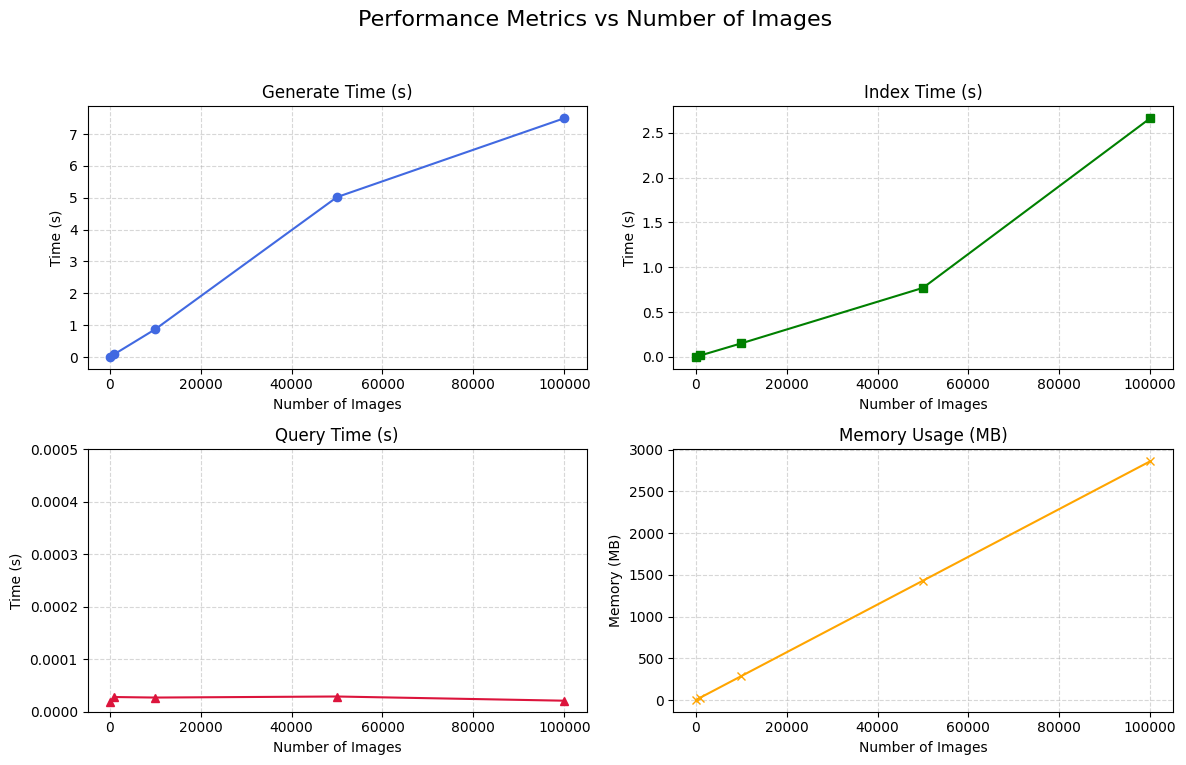

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Performance Metrics vs Number of Images", fontsize=16)

# Plot 1: Generate Time
axes[0, 0].plot(df["Num Images"], df["Generate Time (s)"], marker='o', color='royalblue')
axes[0, 0].set_title("Generate Time (s)")
axes[0, 0].set_xlabel("Number of Images")
axes[0, 0].set_ylabel("Time (s)")
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# Plot 2: Index Time
axes[0, 1].plot(df["Num Images"], df["Index Time (s)"], marker='s', color='green')
axes[0, 1].set_title("Index Time (s)")
axes[0, 1].set_xlabel("Number of Images")
axes[0, 1].set_ylabel("Time (s)")
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

# Plot 3: Query Time
axes[1, 0].plot(df["Num Images"], df["Query Time (s)"], marker='^', color='crimson')
axes[1, 0].set_title("Query Time (s)")
axes[1, 0].set_xlabel("Number of Images")
axes[1, 0].set_ylabel("Time (s)")
axes[1, 0].set_ylim(0, 0.0005)
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

# Plot 4: Memory Usage
axes[1, 1].plot(df["Num Images"], df["Memory (MB)"], marker='x', color='orange')
axes[1, 1].set_title("Memory Usage (MB)")
axes[1, 1].set_xlabel("Number of Images")
axes[1, 1].set_ylabel("Memory (MB)")
axes[1, 1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
